# MNIST 

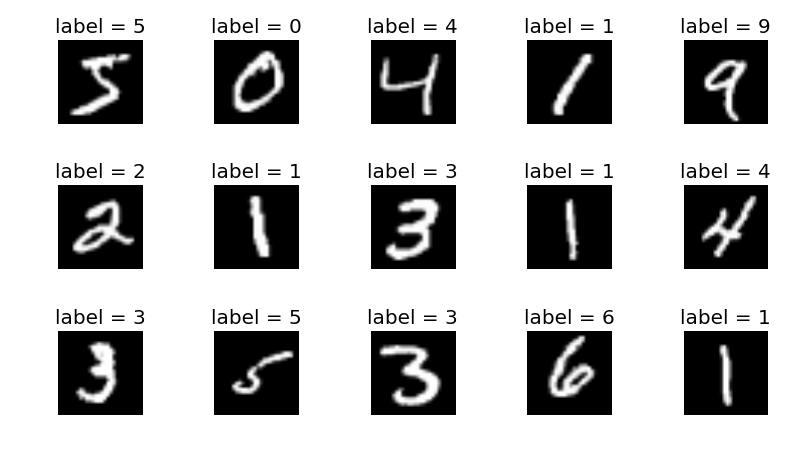

In [8]:
import gzip
import os
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt

## Función auxiliar para listar archivos

`list_files()` obtiene todos los archivos del directorio MNIST para procesarlos.

In [4]:
def list_files(mnist_path):
    return [join(mnist_path,f) for f in os.listdir(mnist_path) if isfile(join(mnist_path, f))]

## Función principal para cargar el dataset

`get_images()` lee los archivos binarios de MNIST y extrae:
- `x_train`, `y_train`: 60,000 imágenes y etiquetas de entrenamiento
- `x_test`, `y_test`: 10,000 imágenes y etiquetas de prueba

Cada imagen es un array de 28x28 píxeles con valores entre 0-255.

In [5]:
def get_images(mnist_path):
    for f in list_files(mnist_path):
        open_func = lambda x: open(x, 'rb')
        if 'train-images' in f:
            with open_func(f) as data:
                _ = int.from_bytes(data.read(4), 'big')
                num_images = int.from_bytes(data.read(4), 'big')
                rows = int.from_bytes(data.read(4), 'big')
                cols = int.from_bytes(data.read(4), 'big')
                train_images = data.read()
                x_train = np.frombuffer(train_images, dtype=np.uint8)
                x_train = x_train.reshape((num_images, rows, cols))
        elif 'train-labels' in f:
            with open_func(f) as data:
                train_labels = data.read()[8:]
                y_train = np.frombuffer(train_labels, dtype=np.uint8)
        if 't10k-images' in f:
            with open_func(f) as data:
                _ = int.from_bytes(data.read(4), 'big')
                num_images = int.from_bytes(data.read(4), 'big')
                rows = int.from_bytes(data.read(4), 'big')
                cols = int.from_bytes(data.read(4), 'big')
                test_images = data.read()
                x_test = np.frombuffer(test_images, dtype=np.uint8)
                x_test = x_test.reshape((num_images, rows, cols))
        elif 't10k-labels' in f:
            with open_func(f) as data:
                test_labels = data.read()[8:]
                y_test = np.frombuffer(test_labels, dtype=np.uint8)
    
    return x_train, y_train, x_test, y_test

In [6]:
mnist_path = '../data/mnist'
x_train, y_train, x_test, y_test = get_images(mnist_path)

print(f"Training set: {x_train.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Test set: {x_test.shape}")
print(f"Test labels: {y_test.shape}")

Training set: (60000, 28, 28)
Training labels: (60000,)
Test set: (10000, 28, 28)
Test labels: (10000,)


## Función de visualización

`plot_number()` muestra una imagen del dataset en escala de grises.

In [9]:
def plot_number(image):
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')

La imagen mostrada corresponde al número: 7


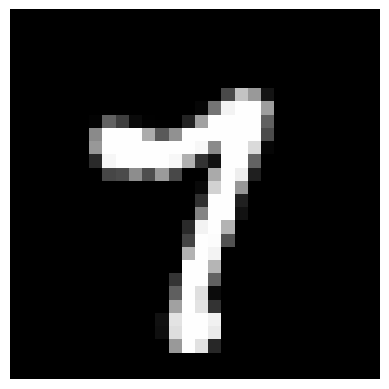

In [20]:
rand_idx = np.random.randint(len(y_test))
print(f"La imagen mostrada corresponde al número: {y_test[rand_idx]}")
plot_number(x_test[rand_idx])